In [32]:
from __future__ import (absolute_import, division, print_function,             
                        unicode_literals)                                      
import pickle
import os
import matplotlib

import pandas as pd

from surprise import KNNBasic
from surprise import Dataset                                                     
from surprise import Reader                                                      
from surprise import dump
from surprise.accuracy import rmse
import matplotlib.pyplot as plt
from collections import Counter

In [13]:
# We will train and test on the u1.base and u1.test files of the movielens-100k dataset.
# if you haven't already, you need to download the movielens-100k dataset
# You can do it manually, or by running:

#Dataset.load_builtin('ml-100k')

# Now, let's load the dataset
train_file = os.path.expanduser('~') + '/Downloads/ml-100k/u1.base'
test_file = os.path.expanduser('~') + '/Downloads/ml-100k/u1.test'
reader = Reader('ml-100k')
data = Dataset.load_from_folds([(train_file, test_file)],reader)
algo = KNNBasic() 
algo

In [4]:
for trainset, testset in data.folds(): 
    algo.train(trainset)                             
    predictions = algo.test(testset)
    rmse(predictions)
                                                                               
    dump('./dump_file', predictions, trainset, algo)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9889
The dump has been saved as file ./dump_file


In [12]:
dump_obj = pickle.load(open('./dump_file', 'rb'))


{'algo': {'bi': None,
  'bsl_options': {},
  'bu': None,
  'k': 40,
  'min_k': 1,
  'n_x': 943,
  'n_y': 1650,
  'name': 'KNNBasic',
  'sim': array([[ 1.        ,  0.46153846,  0.33333333, ...,  0.77777778,
           0.2295082 ,  0.34653465],
         [ 0.46153846,  1.        ,  0.21428571, ...,  0.29411765,
           0.46666667,  0.58333333],
         [ 0.33333333,  0.21428571,  1.        , ...,  0.28571429,
           0.44444444,  1.        ],
         ..., 
         [ 0.77777778,  0.29411765,  0.28571429, ...,  1.        ,
           0.57142857,  0.38461538],
         [ 0.2295082 ,  0.46666667,  0.44444444, ...,  0.57142857,
           1.        ,  0.39583333],
         [ 0.34653465,  0.58333333,  1.        , ...,  0.38461538,
           0.39583333,  1.        ]]),
  'sim_options': {'user_based': True},
  'trainset': <surprise.dataset.Trainset at 0x7f5e1d8fe0f0>,
  'xr': defaultdict(list,
              {0: [(0, 5.0),
                (1, 3.0),
                (2, 4.0),
            

In [43]:
predictions = dump_obj['predictions']
trainset = dump_obj['trainset']
algo = dump_obj['algo']
print('algo: {0}, k = {1}, min_k = {2}'.format(algo['name'], algo['k'], algo['min_k']))


algo: KNNBasic, k = 40, min_k = 1


In [8]:
def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

In [45]:
predictions

[Prediction(uid='1', iid='6', r_ui=5.0, est=3.4686133553239342, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid='1', iid='10', r_ui=3.0, est=3.8662898359581681, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='1', iid='12', r_ui=5.0, est=4.5381940078271672, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='1', iid='14', r_ui=5.0, est=4.2357410199894483, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='1', iid='17', r_ui=3.0, est=3.2280015199341352, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='1', iid='20', r_ui=4.0, est=3.5264529813851433, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='1', iid='23', r_ui=4.0, est=4.3106428721759533, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='1', iid='24', r_ui=3.0, est=3.5398471800775262, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='1', iid='27', r_ui=2.0, est=3.2651182734307027, 

In [18]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
df.head()

uid iid  rui       est                                    details   Iu   Ui  \
0   1   6  5.0  3.468613  {'actual_k': 20, 'was_impossible': False}  135   20   
1   1  10  3.0  3.866290  {'actual_k': 40, 'was_impossible': False}  135   73   
2   1  12  5.0  4.538194  {'actual_k': 40, 'was_impossible': False}  135  211   
3   1  14  5.0  4.235741  {'actual_k': 40, 'was_impossible': False}  135  140   
4   1  17  3.0  3.228002  {'actual_k': 40, 'was_impossible': False}  135   72   

        err  
0  1.531387  
1  0.866290  
2  0.461806  
3  0.764259  
4  0.228002

In [20]:
best_prediction =  df.sort_values(by = 'err')[ : 10]
worst_prediction = df.sort_values(by = 'err')[-10:]

In [21]:
best_prediction

uid   iid  rui  est                                   details   Iu  Ui  \
272      5   439  1.0  1.0  {'actual_k': 3, 'was_impossible': False}   91   3   
886     13   314  1.0  1.0  {'actual_k': 2, 'was_impossible': False}  373   2   
156      2   314  1.0  1.0  {'actual_k': 2, 'was_impossible': False}   40   2   
926     13   437  1.0  1.0  {'actual_k': 3, 'was_impossible': False}  373   3   
9276   206   314  1.0  1.0  {'actual_k': 1, 'was_impossible': False}   33   2   
19118  405   437  1.0  1.0  {'actual_k': 3, 'was_impossible': False}  582   3   
8032   181  1334  1.0  1.0  {'actual_k': 1, 'was_impossible': False}  218   1   
8041   181  1354  1.0  1.0  {'actual_k': 1, 'was_impossible': False}  218   1   
9202   201  1424  3.0  3.0  {'actual_k': 1, 'was_impossible': False}  215   1   
3018    60  1123  4.0  4.0  {'actual_k': 1, 'was_impossible': False}  119   1   

       err  
272    0.0  
886    0.0  
156    0.0  
926    0.0  
9276   0.0  
19118  0.0  
8032   0.0  
8041   0.0  
9202   0.0  
3018   0.0

In [22]:
worst_prediction 

uid   iid  rui       est                                    details  \
9406   208   302  1.0  4.308447  {'actual_k': 40, 'was_impossible': False}   
19089  405   169  1.0  4.364728  {'actual_k': 40, 'was_impossible': False}   
19785  436   132  1.0  4.365369  {'actual_k': 40, 'was_impossible': False}   
157      2   315  1.0  4.381308  {'actual_k': 40, 'was_impossible': False}   
8503   193    56  1.0  4.386478  {'actual_k': 40, 'was_impossible': False}   
5531   113   976  5.0  1.610771   {'actual_k': 7, 'was_impossible': False}   
7917   181   408  1.0  4.421499  {'actual_k': 40, 'was_impossible': False}   
7390   167   169  1.0  4.664991  {'actual_k': 40, 'was_impossible': False}   
7412   167  1306  5.0  1.000000   {'actual_k': 1, 'was_impossible': False}   
5553   114  1104  5.0  1.000000   {'actual_k': 1, 'was_impossible': False}   

        Iu   Ui       err  
9406    11  245  3.308447  
19089  582   97  3.364728  
19785  126  200  3.365369  
157     40  136  3.381308  
8503    61  312  3.386478  
5531    31    7  3.389229  
7917   218   93  3.421499  
7390    38   97  3.664991  
7412    38    1  4.000000  
5553    27    1  4.000000

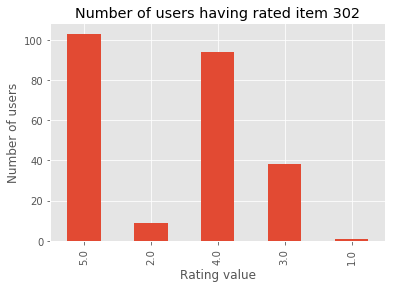

In [40]:
matplotlib.style.use('ggplot')
counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('302')]])
w=pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated item 302')

plt.show()

0
5.0  103
2.0    9
4.0   94
3.0   38
1.0    1